#1. Project Title and Introduction

# Customer Churn Analysis

This notebook analyses the Telco Customer Churn dataset to explore patterns related to customer churn and retention. We start by loading the data, cleaning it and exploring it, setting the stage for predictive modeling.

The following things are to be done in the project:
- Load and clean the dataset
- Exploratory Data Analysis
- Feature Engineering
- Model Training
- Compare baseline logistic regression with a Random Forest Classifier

#2. Imports and Setup

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#3. Data Loading

In [62]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [63]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#4. Data Overview

4.1 Check the shape of the dataset

In [64]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset has 7043 rows and 21 columns.


4.2 Gather info on data types and missing values

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


4.3 Summary statistics for numerical columns

In [66]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


5. Data Cleaning

5.1 Check for missing values

In [67]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


5.2 Check unique values in all the

In [68]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"{col} ({len(unique_vals)} unique values): {unique_vals[:10]}")
    print("-" * 40)

customerID (7043 unique values): ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU'
 '9305-CDSKC' '1452-KIOVK' '6713-OKOMC' '7892-POOKP' '6388-TABGU']
----------------------------------------
gender (2 unique values): ['Female' 'Male']
----------------------------------------
SeniorCitizen (2 unique values): [0 1]
----------------------------------------
Partner (2 unique values): ['Yes' 'No']
----------------------------------------
Dependents (2 unique values): ['No' 'Yes']
----------------------------------------
tenure (73 unique values): [ 1 34  2 45  8 22 10 28 62 13]
----------------------------------------
PhoneService (2 unique values): ['No' 'Yes']
----------------------------------------
MultipleLines (3 unique values): ['No phone service' 'No' 'Yes']
----------------------------------------
InternetService (3 unique values): ['DSL' 'Fiber optic' 'No']
----------------------------------------
OnlineSecurity (3 unique values): ['No' 'Yes' 'No internet service']

5.3 Since TotalCharges is object we convert it into numeric

In [69]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [70]:
# Check for any NaN values introduced
print(df['TotalCharges'].isnull().sum())

11


In [71]:
# Drop rows with NaN TotalCharges if any
df = df.dropna(subset=['TotalCharges'])

In [72]:
# Confirm no missing values remain in TotalCharges
print(df['TotalCharges'].isnull().sum())

0


#6. Exploratory Data Analysis (EDA)


6.1 Churn Distribution

Churn
No     5163
Yes    1869
Name: count, dtype: int64

Churn Percentage:
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


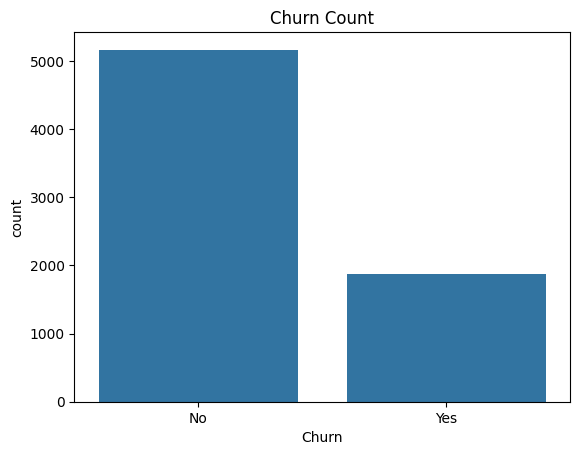

In [73]:
print(df['Churn'].value_counts())
print("\nChurn Percentage:")
print(df['Churn'].value_counts(normalize=True)*100)
# Plot churn count
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.show()

6.2 Summary statistics for numerical columns grouped by churn (Numerical Features Exploration)


In [74]:
df.groupby('Churn')[['MonthlyCharges', 'TotalCharges', 'tenure']].describe()

MonthlyCharges                                                     \
               count       mean        std    min    25%    50%     75%   
Churn                                                                     
No            5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475   
Yes           1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200   

              TotalCharges               ...                     tenure  \
          max        count         mean  ...       75%      max   count   
Churn                                    ...                              
No     118.75       5163.0  2555.344141  ...  4264.125  8672.45  5163.0   
Yes    118.35       1869.0  1531.796094  ...  2331.300  8684.80  1869.0   

                                                          
            mean        std  min   25%   50%   75%   max  
Churn                                                     
No     37.650010  24.076940  1.0  15.0  38.0  61.0  72.0  
Yes    17.979133  19.531123  1.0   2.0  10.0  29.0  72.0  

[2 rows x 24 columns]

6.3 Distribution plots for numerical features by churn

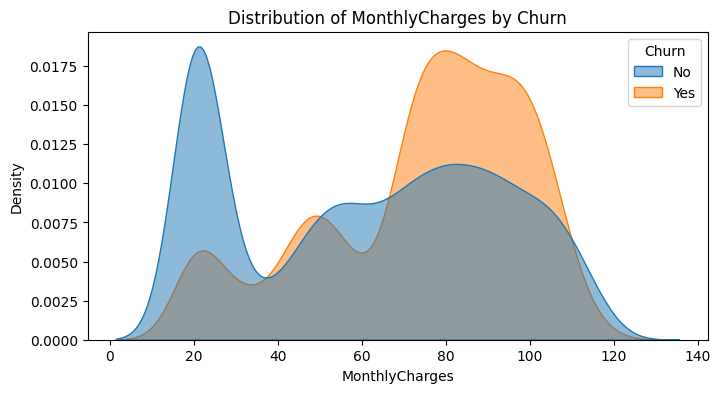

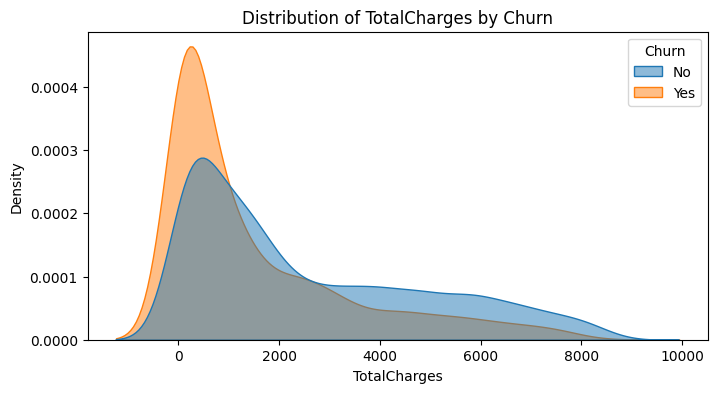

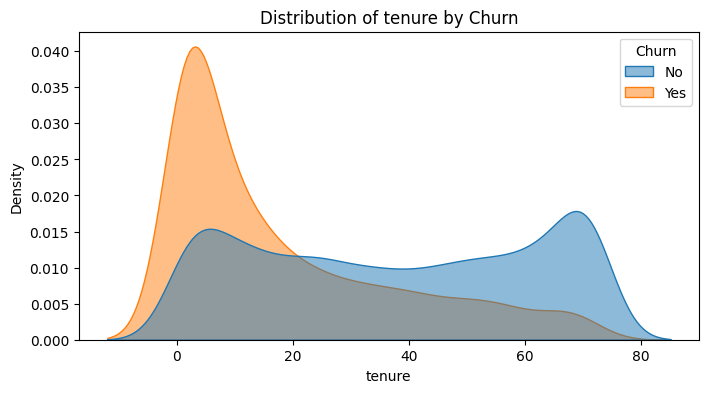

In [75]:
num_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
for feature in num_features:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df, x=feature, hue='Churn', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Distribution of {feature} by Churn')
    plt.show()

6.4 Categorical Features Exploration

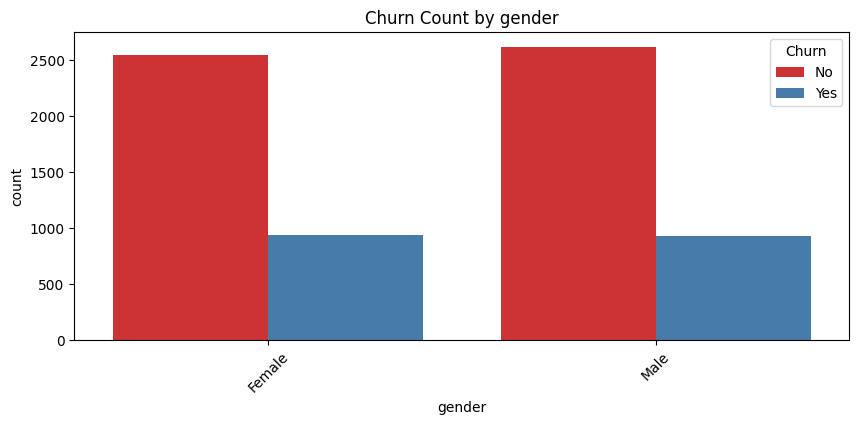

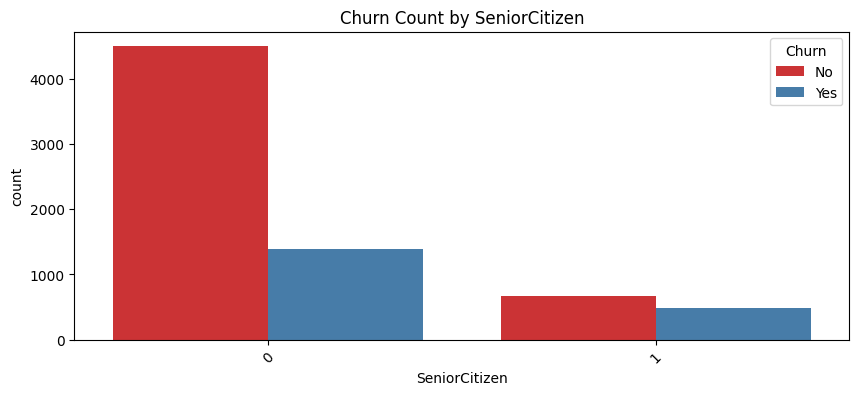

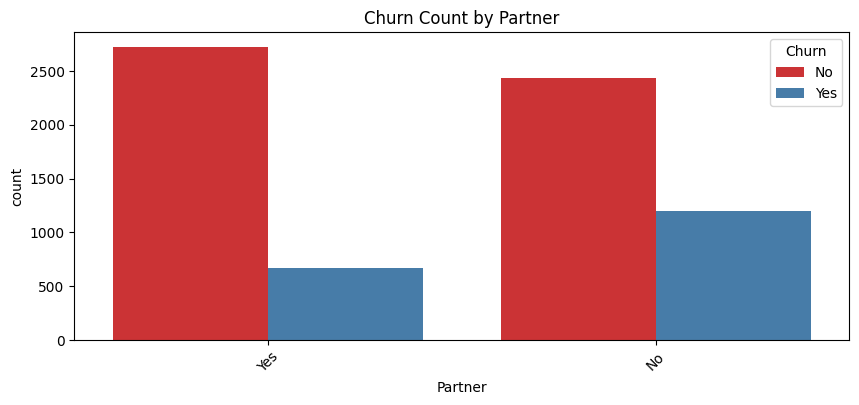

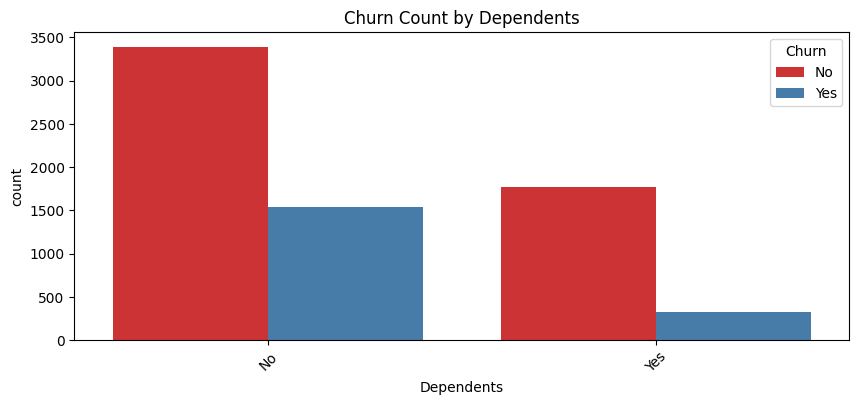

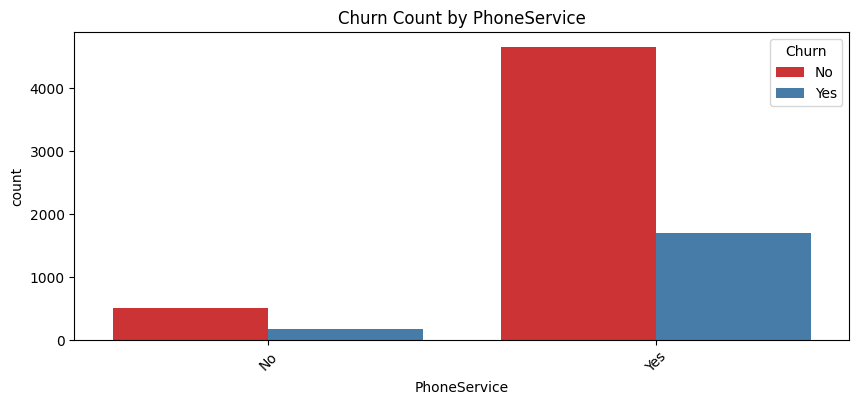

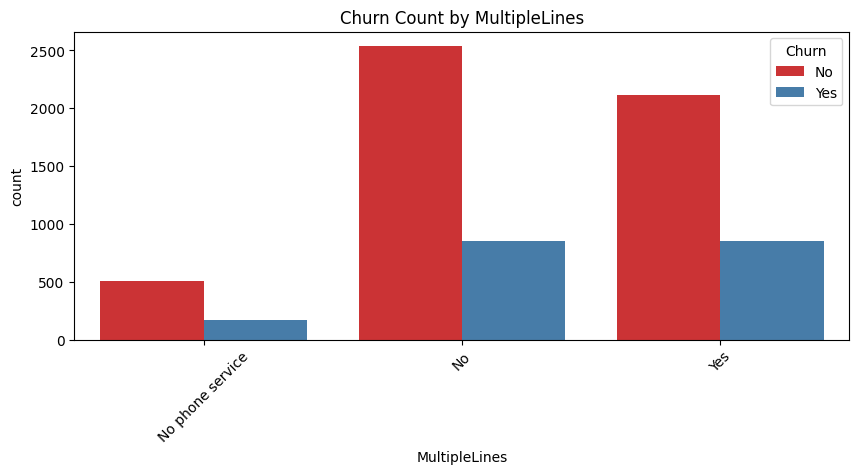

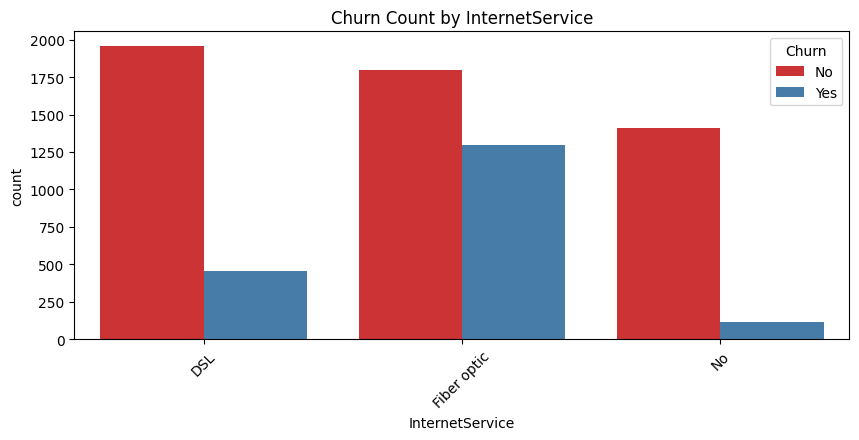

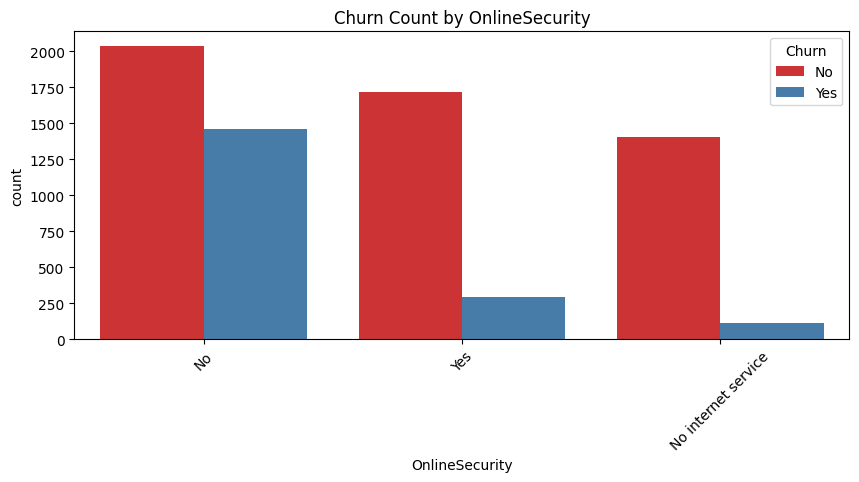

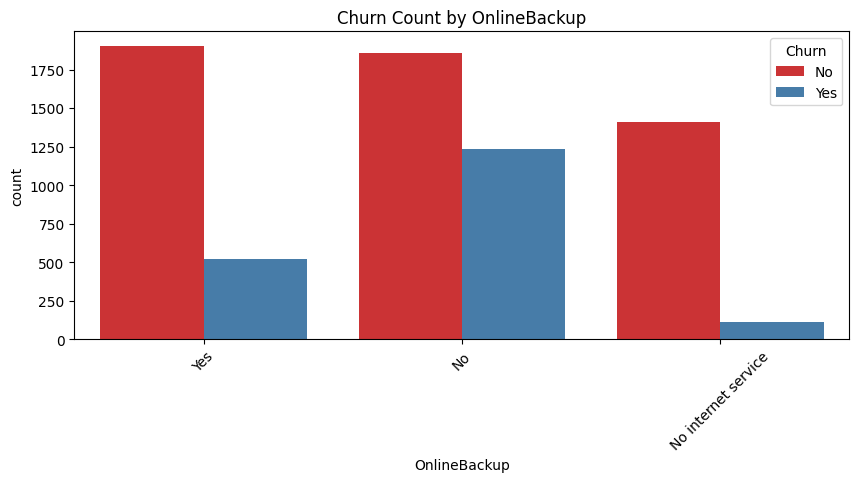

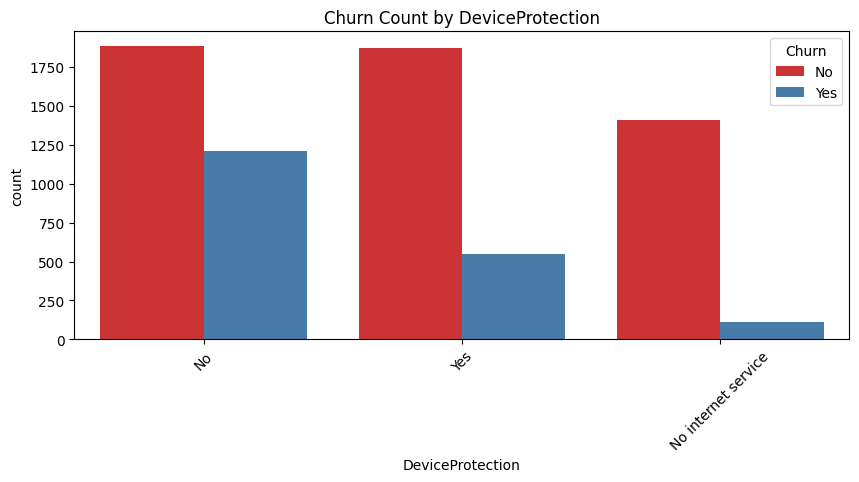

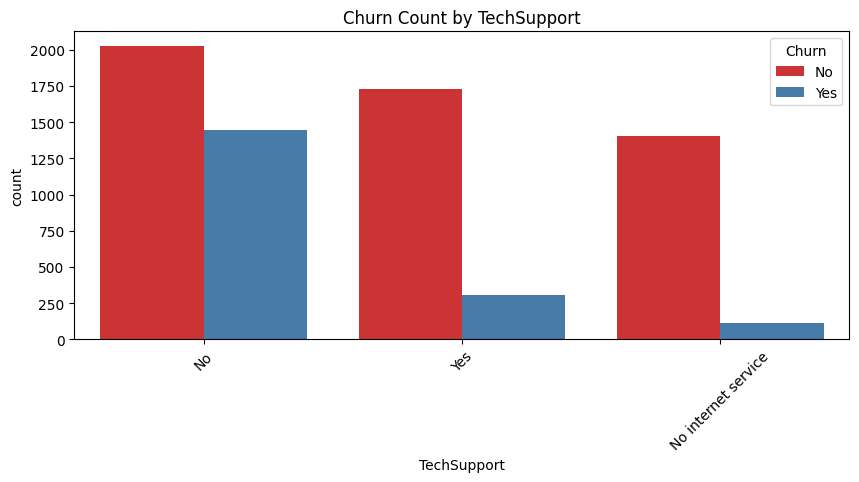

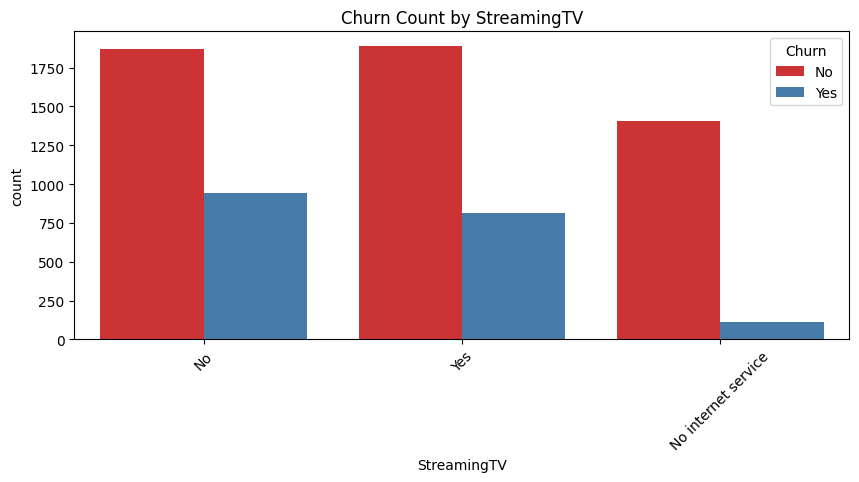

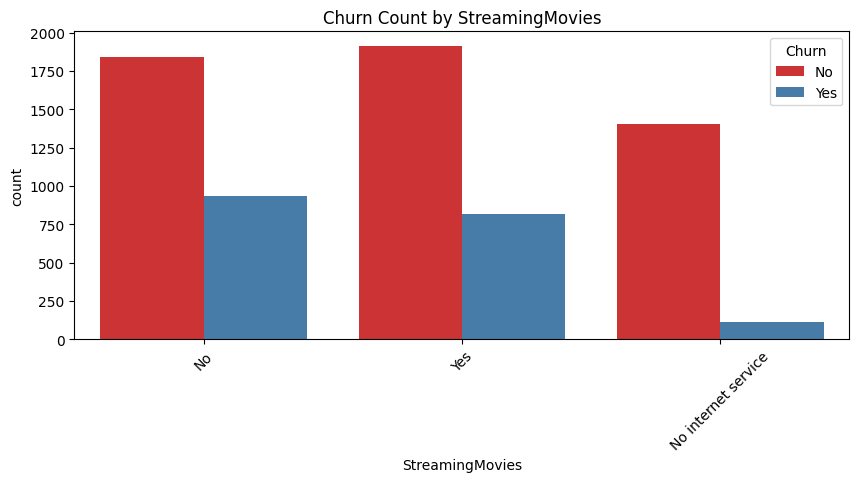

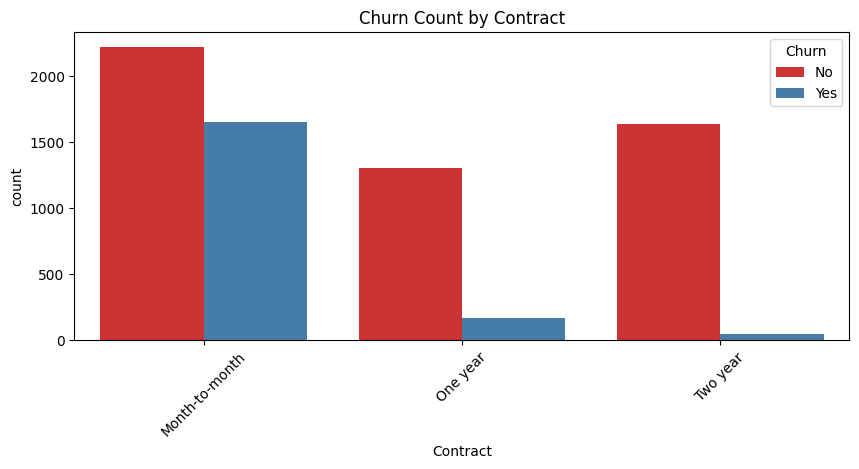

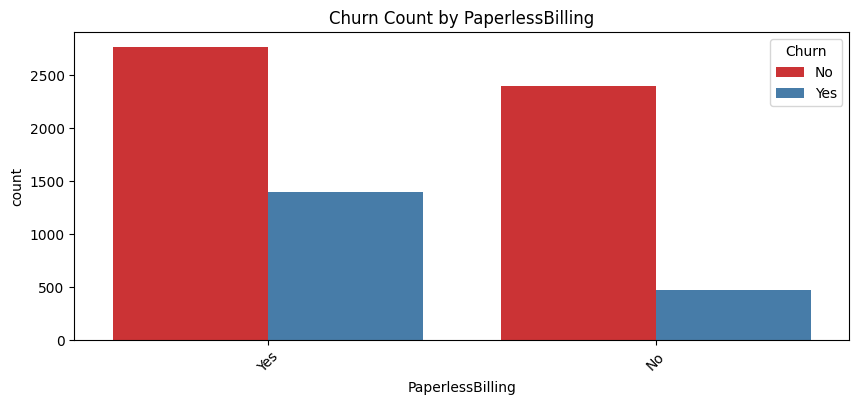

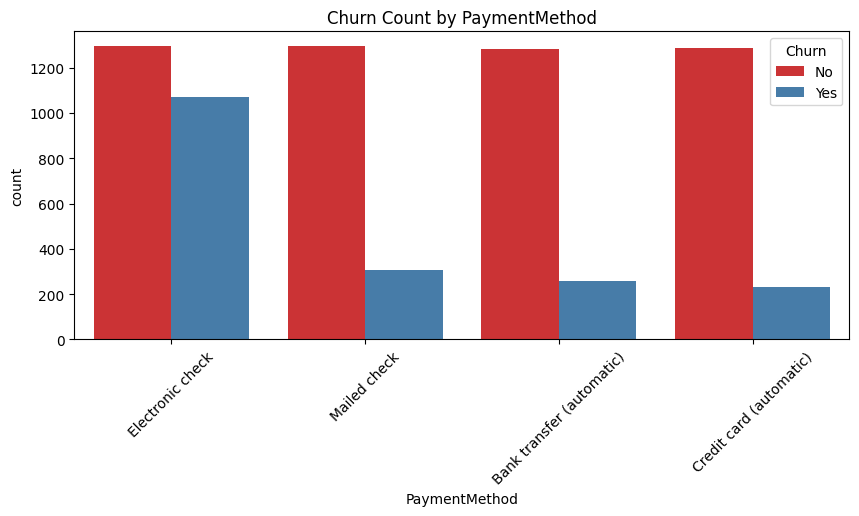

In [76]:
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in cat_features:
    plt.figure(figsize=(10,4))
    sns.countplot(x=feature, hue='Churn', data=df, palette='Set1')
    plt.title(f'Churn Count by {feature}')
    plt.xticks(rotation=45)
    plt.show()

6.4.1 Distribution of Monthly Charges by Churn

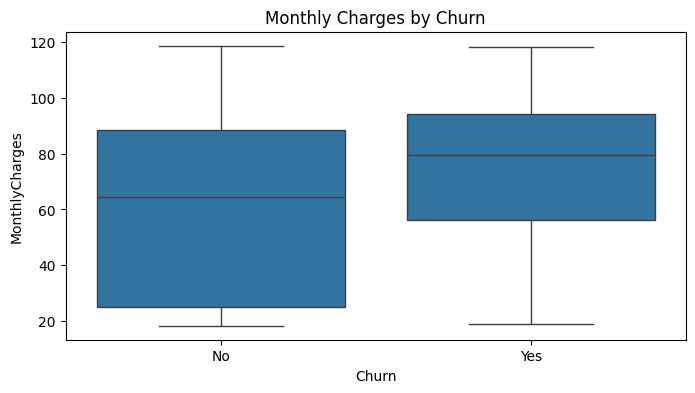

In [77]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

6.4.2 Distribution of Tenure by Churn


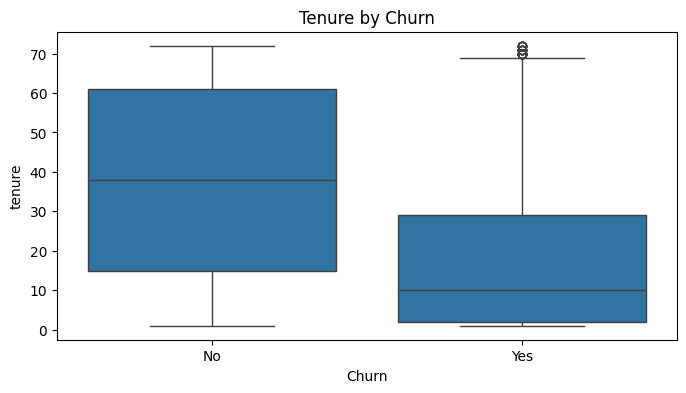

In [78]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure by Churn')
plt.show()

6.5 Correlation Analysis

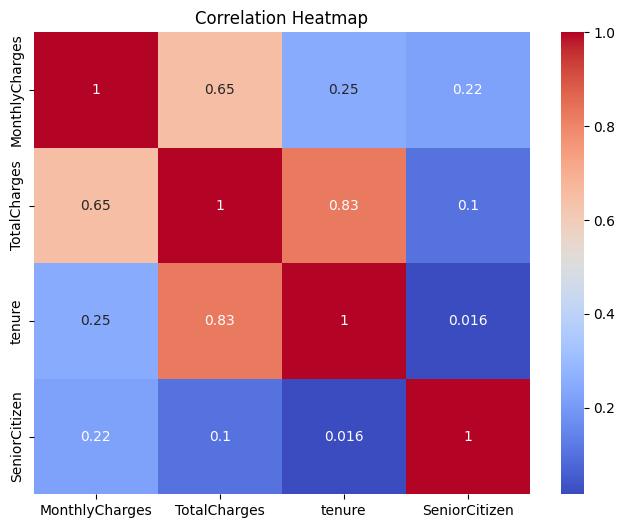

In [79]:
plt.figure(figsize=(8,6))
corr = df[['MonthlyCharges', 'TotalCharges', 'tenure', 'SeniorCitizen']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

6.6. Feature Relationships - Pairplot (numerical + churn)

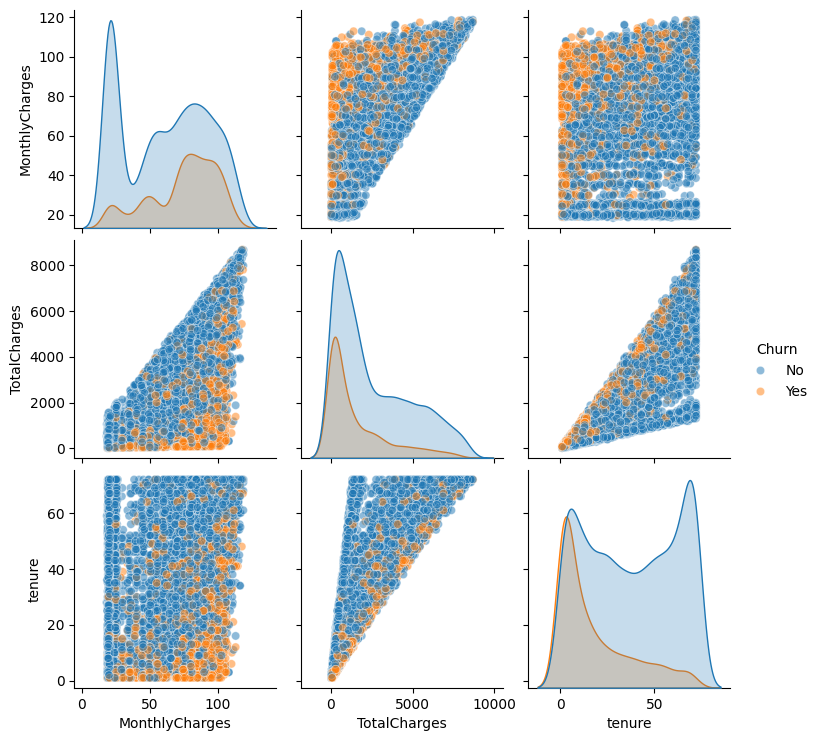

In [80]:
sns.pairplot(df, vars=num_features, hue='Churn', plot_kws={'alpha':0.5})
plt.show()

#7. Feature Engineering

7.1 Create a copy of the dataset

In [81]:
df_cleaned = df.copy()

7.2 Identify categorical columns to encode

In [82]:
cat_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('customerID')  # Remove ID column
cat_cols.remove('Churn')       # Remove target column

print("Categorical columns to encode:", cat_cols)

Categorical columns to encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


7.3 Encode target variable (Churn)

In [83]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cleaned['Churn'] = le.fit_transform(df_cleaned['Churn'])

7.4 Label encode binary categorical columns

In [84]:
binary_cols = [col for col in cat_cols if df_cleaned[col].nunique() == 2]

for col in binary_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

7.5 One-Hot encode multi-category columns

In [85]:
multi_cat_cols = [col for col in cat_cols if df_cleaned[col].nunique() > 2]

df_cleaned = pd.get_dummies(df_cleaned, columns=multi_cat_cols)

7.6 Create tenure groups and one-hot encode them

In [86]:
df_cleaned['tenure_group'] = pd.cut(df_cleaned['tenure'], bins=[0,12,24,48,60,72],
                                    labels=['0-12', '13-24', '25-48', '49-60', '61-72'])

df_cleaned = pd.get_dummies(df_cleaned, columns=['tenure_group'])

#8 Model Training and Evaluation (Logistic Regression)

8.1 Split data into features and target

In [87]:
X = df_cleaned.drop(columns=['customerID', 'Churn'])  # Features
y = df_cleaned['Churn']                              # Target

8.2 Split into train (70%) and temp (30%)

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


8.3 Split temp into validation (10%) and test (20%)

In [89]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp)

8.4 Scale features

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler only on train data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

8.5 Train Logistic Regression on scaled data

In [91]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=5000)

8.5 Evaluate on Training set

In [92]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict on training data
y_train_pred = model.predict(X_train_scaled)
y_train_prob = model.predict_proba(X_train_scaled)[:, 1]

print("Training Classification Report:\n", classification_report(y_train, y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

train_auc = roc_auc_score(y_train, y_train_prob)
print(f"Training ROC AUC Score: {train_auc:.4f}")


Training Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      3614
           1       0.68      0.55      0.61      1308

    accuracy                           0.81      4922
   macro avg       0.76      0.73      0.74      4922
weighted avg       0.80      0.81      0.80      4922

Training Confusion Matrix:
 [[3269  345]
 [ 590  718]]
Training ROC AUC Score: 0.8533


8.6 Evaluate on validation set

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       516
           1       0.65      0.55      0.60       187

    accuracy                           0.80       703
   macro avg       0.75      0.72      0.73       703
weighted avg       0.79      0.80      0.80       703

Validation Confusion Matrix:
 [[460  56]
 [ 84 103]]
Validation ROC AUC Score: 0.8517


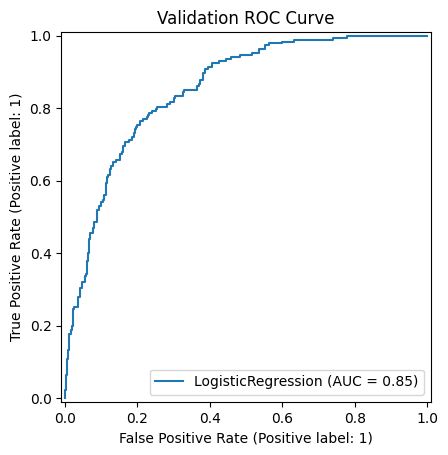

In [93]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

y_val_pred = model.predict(X_val_scaled)
y_val_prob = model.predict_proba(X_val_scaled)[:, 1]

print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

val_auc = roc_auc_score(y_val, y_val_prob)
print(f"Validation ROC AUC Score: {val_auc:.4f}")

RocCurveDisplay.from_estimator(model, X_val_scaled, y_val)
plt.title('Validation ROC Curve')
plt.show()


8.7 Final evaluation on test set

Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Test Confusion Matrix:
 [[918 115]
 [183 191]]
Test ROC AUC Score: 0.8289


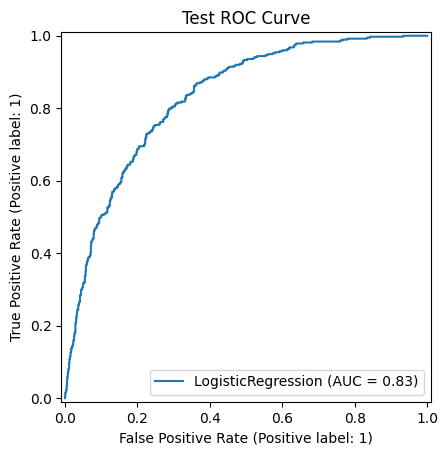

In [94]:
y_test_pred = model.predict(X_test_scaled)
y_test_prob = model.predict_proba(X_test_scaled)[:, 1]

print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

test_auc = roc_auc_score(y_test, y_test_prob)
print(f"Test ROC AUC Score: {test_auc:.4f}")

RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title('Test ROC Curve')
plt.show()


#9. Random Forest Model Training & Evaluation

9.1 Import necessary libraries

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

9.2 Initialize and train Random Forest on training data

In [96]:
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, n_estimators=200, random_state=42)

9.3 Evaluate on training set

Training Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      3614
           1       0.62      0.87      0.73      1308

    accuracy                           0.83      4922
   macro avg       0.78      0.84      0.80      4922
weighted avg       0.86      0.83      0.83      4922

Training Confusion Matrix:
 [[2930  684]
 [ 175 1133]]
Training ROC AUC Score: 0.9171


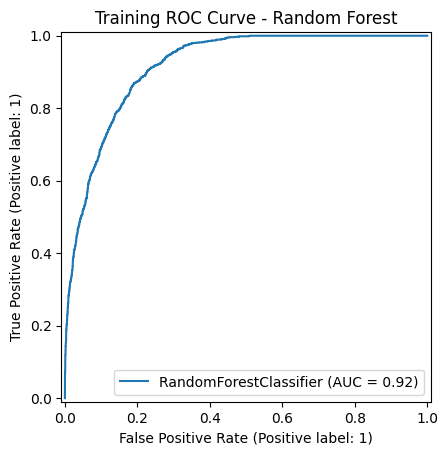

In [97]:
y_train_pred = rf_model.predict(X_train)
y_train_prob = rf_model.predict_proba(X_train)[:, 1]

print("Training Classification Report:\n", classification_report(y_train, y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

train_auc = roc_auc_score(y_train, y_train_prob)
print(f"Training ROC AUC Score: {train_auc:.4f}")

RocCurveDisplay.from_estimator(rf_model, X_train, y_train)
plt.title('Training ROC Curve - Random Forest')
plt.show()

9.4 Evaluate on validation set

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82       516
           1       0.53      0.78      0.63       187

    accuracy                           0.76       703
   macro avg       0.72      0.76      0.73       703
weighted avg       0.80      0.76      0.77       703

Validation Confusion Matrix:
 [[388 128]
 [ 42 145]]
Validation ROC AUC Score: 0.8555


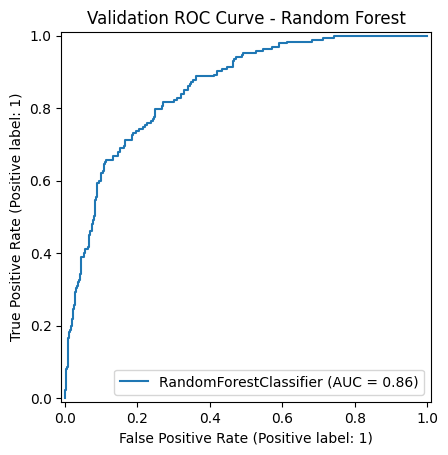

In [98]:
y_val_pred = rf_model.predict(X_val)
y_val_prob = rf_model.predict_proba(X_val)[:, 1]

print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

val_auc = roc_auc_score(y_val, y_val_prob)
print(f"Validation ROC AUC Score: {val_auc:.4f}")

RocCurveDisplay.from_estimator(rf_model, X_val, y_val)
plt.title('Validation ROC Curve - Random Forest')
plt.show()


9.4 Final evaluation on test set

Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      1033
           1       0.53      0.72      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.76      0.77      1407

Test Confusion Matrix:
 [[793 240]
 [104 270]]
Test ROC AUC Score: 0.8247


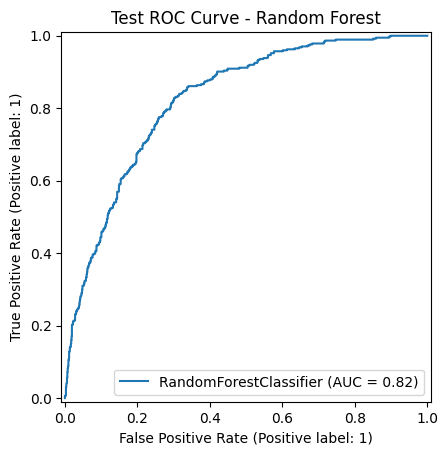

In [99]:
y_test_pred = rf_model.predict(X_test)
y_test_prob = rf_model.predict_proba(X_test)[:, 1]

print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

test_auc = roc_auc_score(y_test, y_test_prob)
print(f"Test ROC AUC Score: {test_auc:.4f}")

RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title('Test ROC Curve - Random Forest')
plt.show()


#10. Additional Plots

10.1. Feature Importance Plot (Random Forest)

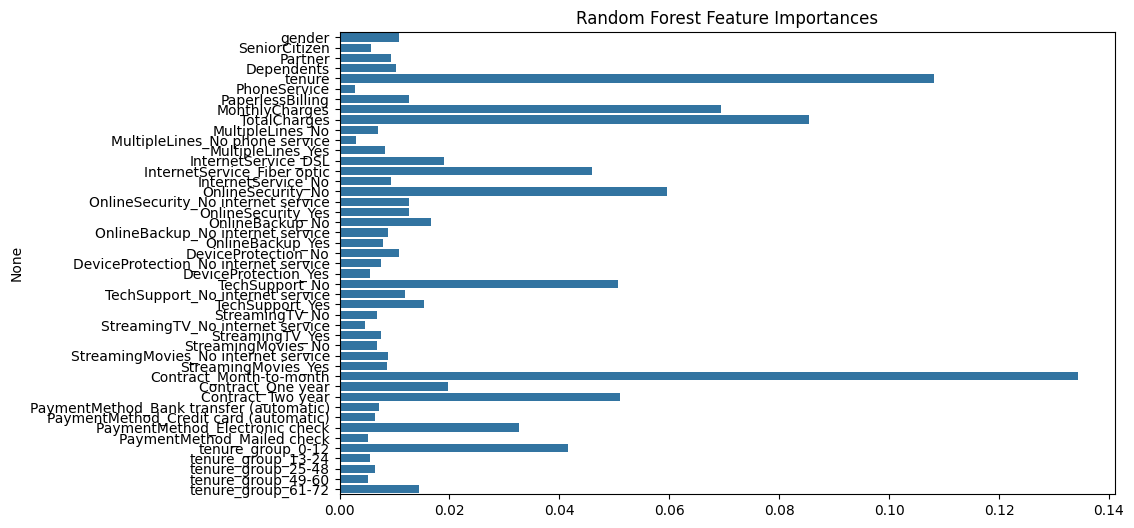

In [100]:
importances = rf_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title('Random Forest Feature Importances')
plt.show()


10.2 ROC Curve Comparison (Logistic Regression vs Random Forest)

<Figure size 800x600 with 0 Axes>

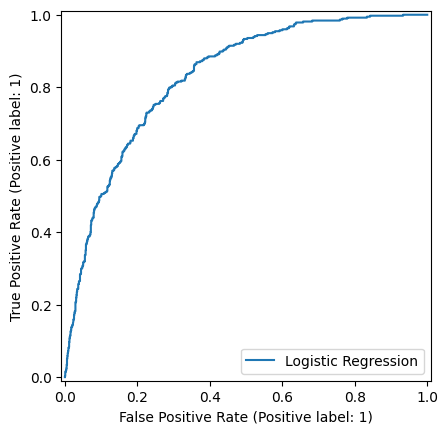

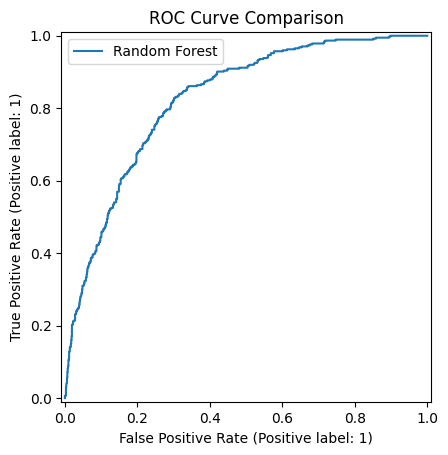

In [101]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(8,6))

RocCurveDisplay.from_estimator(model, X_test_scaled, y_test, label='Logistic Regression')
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, label='Random Forest')

plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


10.3 Precision-Recall Curve

<Figure size 800x600 with 0 Axes>

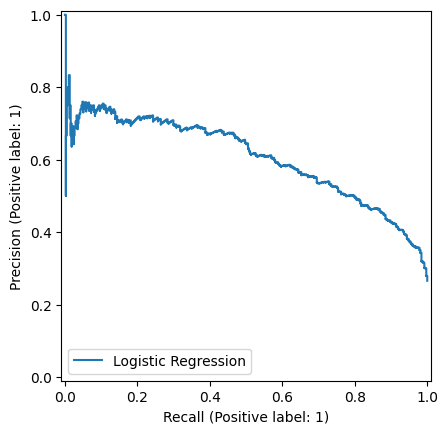

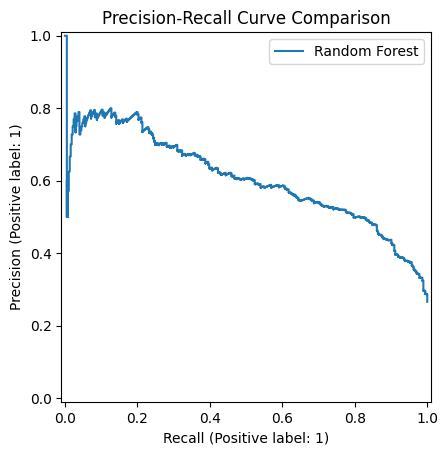

In [102]:
from sklearn.metrics import PrecisionRecallDisplay

plt.figure(figsize=(8,6))

PrecisionRecallDisplay.from_estimator(model, X_test_scaled, y_test, label='Logistic Regression')
PrecisionRecallDisplay.from_estimator(rf_model, X_test, y_test, label='Random Forest')

plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.show()


10.4 Confusion Matrix Heatmaps

<Figure size 600x500 with 0 Axes>

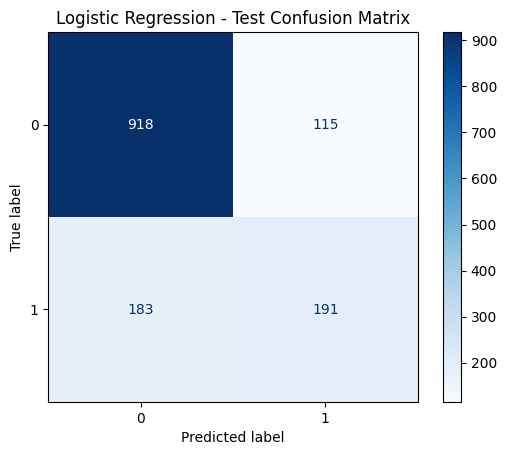

<Figure size 600x500 with 0 Axes>

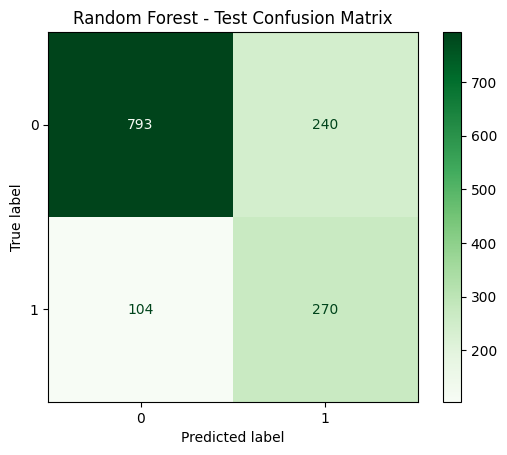

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6,5))
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap='Blues')
plt.title('Logistic Regression - Test Confusion Matrix')
plt.show()

plt.figure(figsize=(6,5))
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Greens')
plt.title('Random Forest - Test Confusion Matrix')
plt.show()
